# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

## Откроем файл с данными и изучим общую информацию

In [2]:
# Прочитаем фаил
df = pd.read_csv('/datasets/games.csv')

In [3]:
# Выведем на экран значения и информацию
display(df.head(10))
df.info(10)
df.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Подготовим данные

In [4]:
# Приведем все столбцы к строчному виду
df.columns = map(str.lower, df.columns)
display(df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# Приведем к float32 столбцы.
df = df.astype({'year_of_release': 'float32', 'na_sales':'float32', 'eu_sales':'float32',
                'jp_sales':'float32', 'other_sales':'float32', 'critic_score':'float32'})
#df.info()

In [6]:
# столбец year_of_release, critic_score приведем к виду int.
# столбец в user_score к float
df['year_of_release'] = pd.to_numeric(df['year_of_release'], downcast='integer')
df['critic_score'] = pd.to_numeric(df['critic_score'], downcast='integer')
df['user_score'] = pd.to_numeric(df['user_score'], downcast='float', errors ='coerce')
df['user_score'] = df['user_score'].round(1)

df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float32
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: float32(7), object(4)
memory usage: 979.5+ KB


В столбцах critic_score,user_score не указали оценку и заменим значение NAN нулями.
В столбце rating значения NAN не чем заполнят не будем, потому что мы не сможем правильно их заполнить

In [7]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

display(df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.080000,3.580000,6.81,0.77,-1.0,-1.0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.270000,8.890000,10.22,1.00,-1.0,-1.0,NaN
5,Tetris,GB,1989.0,Puzzle,23.200001,2.260000,4.22,0.58,-1.0,-1.0,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.280000,9.140000,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.960000,9.180000,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.440000,6.940000,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.930000,0.630000,0.28,0.47,-1.0,-1.0,NaN


Посчитаем суммарные продажи во всех регионах по жанру игр.

In [8]:
world_sale = df.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
display(world_sale)

,eu_sales,jp_sales,na_sales
genre,,,
Action,519.130005,161.429993,879.010010
Adventure,63.540001,52.299999,105.260002
Fighting,100.330002,87.480003,223.360001
Misc,212.740005,108.110001,407.269989
Platform,200.350006,130.830002,445.500000
Puzzle,50.009998,57.310001,122.870003
Racing,236.509995,56.709999,359.350006
Role-Playing,188.710007,355.410004,330.809998
Shooter,317.339996,38.759998,592.239990


In [9]:
# Создадим колонку с общими продажами
df['world_sales'] = (df['na_sales'] + df['eu_sales'] 
                                   + df['jp_sales'] + df['other_sales'])
display(df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985.0,Platform,29.080000,3.580000,6.81,0.77,-1.0,-1.0,NaN,40.240002
2,Mario Kart Wii,Wii,2008.0,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009.0,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.270000,8.890000,10.22,1.00,-1.0,-1.0,NaN,31.380001
5,Tetris,GB,1989.0,Puzzle,23.200001,2.260000,4.22,0.58,-1.0,-1.0,NaN,30.260000
6,New Super Mario Bros.,DS,2006.0,Platform,11.280000,9.140000,6.50,2.88,89.0,8.5,E,29.799999
7,Wii Play,Wii,2006.0,Misc,13.960000,9.180000,2.93,2.84,58.0,6.6,E,28.910000
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.440000,6.940000,4.70,2.24,87.0,8.4,E,28.319998
9,Duck Hunt,NES,1984.0,Shooter,26.930000,0.630000,0.28,0.47,-1.0,-1.0,NaN,28.309999


In [10]:
# Удалим строки с пропусками в столбцах name, genre,year_of_release, их там мало.
df = df.dropna(subset=['name'])
df = df.dropna(subset=['genre'])
df = df.dropna(subset=['year_of_release'])

In [11]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float32
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     16444 non-null  float32
 9   user_score       16444 non-null  float32
 10  rating           9768 non-null   object 
 11  world_sales      16444 non-null  float32
dtypes: float32(8), object(4)
memory usage: 1.1+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name  : кол

## Проведем исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Оценим важны ли данные за все перриоды.

In [12]:
# Посмотрим, сколько игр выпускалось в разные годы с помощью pivot_table создадим таблицу.
game_count = df.pivot_table(index = 'year_of_release', values = 'genre' , aggfunc = 'count')
display(game_count)

,genre
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


<AxesSubplot:xlabel='year_of_release'>

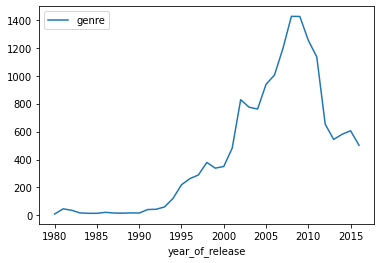

In [13]:
# Построим гррафик для наглядности.
game_count.plot(y='genre')

До 2001 года выпускалось мало игр, до 500, думаю эти данные можно не брать в расчет.

In [14]:
# Методом query уберем данные до 2001 года.
df = df.query('year_of_release > 2001')

Посмотрим, как менялись продажи по платформам.

In [15]:
sale_platform_table = df.pivot_table(index = 'platform', values = 'genre', aggfunc = 'count')
sale_platform_table = sale_platform_table.sort_values(by = 'genre', ascending=False)
display(sale_platform_table)

,genre
platform,
DS,2120
PS2,1860
PS3,1306
Wii,1286
X360,1232
PSP,1193
PC,895
XB,769
GBA,703


<AxesSubplot:xlabel='platform'>

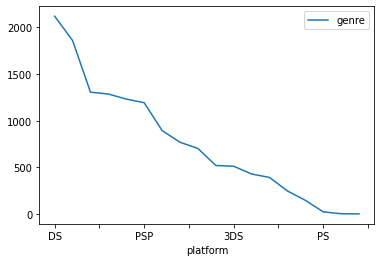

In [16]:
sale_platform_table.plot(y='genre')

Выберем топ 5 платформ и выведем их.

In [17]:
# Выберем 5 лучших.
best_sale_platform = list(sale_platform_table.index[:5])
display(best_sale_platform)

['DS', 'PS2', 'PS3', 'Wii', 'X360']

Выберем платформы с наибольшими суммарными продажами и построем распределение по годам.

In [18]:
for platform in best_sale_platform:
    best_sale_platform_table = pd.pivot_table(df.query('platform == @platform'), index=['platform','year_of_release'], values='world_sales', aggfunc='sum')
    print(best_sale_platform_table)

                          world_sales
platform year_of_release             
DS       2004.0             17.270000
         2005.0            130.139999
         2006.0            119.809998
         2007.0            146.940002
         2008.0            145.309998
         2009.0            119.540001
         2010.0             85.019997
         2011.0             26.180000
         2012.0             11.010000
         2013.0              1.540000
                          world_sales
platform year_of_release             
PS2      2002.0            205.380005
         2003.0            184.309998
         2004.0            211.809998
         2005.0            160.660004
         2006.0            103.419998
         2007.0             75.989998
         2008.0             53.900002
         2009.0             26.400000
         2010.0              5.640000
         2011.0              0.450000
                          world_sales
platform year_of_release             
PS3      200

Если посмотреть на платформы PS и Xbox платформы меняються в среднем раз в 10 - 12 лет.

Всплеск создания играм произошел с 2001 по 2011 года. Затем, идет спад может быть из-за того что игры стале качественне и надо больше времени для их разработки.

In [19]:
for platform in best_sale_platform:
    best_sale_platform_table = pd.pivot_table(df.query('platform == @platform'), index=['platform'], values='world_sales', aggfunc='sum')
    print(best_sale_platform_table)

          world_sales
platform             
DS          802.76001
          world_sales
platform             
PS2       1027.959961
          world_sales
platform             
PS3        931.339966
          world_sales
platform             
Wii        891.179993
          world_sales
platform             
X360        961.23999


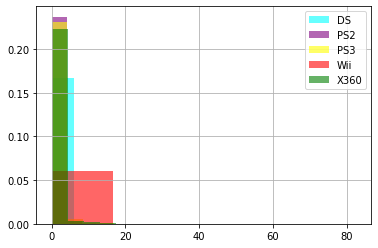

In [20]:
df[df['platform'] == 'DS']['world_sales'].hist(bins=5, density=True, label='DS', alpha=0.6, color='cyan')
df[df['platform'] == 'PS2']['world_sales'].hist(bins=5, density=True, label='PS2', alpha=0.6, color='purple')
df[df['platform'] == 'PS3']['world_sales'].hist(bins=5, density=True, label='PS3', alpha=0.6, color='yellow')
df[df['platform'] == 'Wii']['world_sales'].hist(bins=5, density=True, label='Wii', alpha=0.6, color='red')
df[df['platform'] == 'X360']['world_sales'].hist(bins=5, density=True, label='X360', alpha=0.6, color='green')
plt.legend();

Самые большие продажи у платформ PS2, DS, PS3, Wii и X360. Но продажи по всем платформам падают.Также возьмем PS4 потому что это новая платформа и игры буду делаться на ней.

In [21]:
platform_sales_pivot_table = pd.pivot_table(df.query('platform == "PS4"'), index=['platform','year_of_release'], 
                                            values='world_sales', aggfunc='sum')
print(platform_sales_pivot_table)

                          world_sales
platform year_of_release             
PS4      2013.0             25.990000
         2014.0            100.000000
         2015.0            118.900002
         2016.0             69.250000


Видно что обычно после выхода новой платфформы старая еще поддерживаеться, и происходит всплеск выпуска игра после выхода новой платформы и вовремя поддрежки старой.Но из-за увелечиня качества платформ выпуск игр стал меньше. Из-за чего берем актуальными данные с 2014 года по 2016год.

In [22]:
# Методом query получаем срез с 2014 года по 2016.
actual_platform_sales = df.query('year_of_release > 2013')
display(actual_platform_sales)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,14.630000
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,NaN,11.680000
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.580000
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,NaN,7.980000
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.010000
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.010000
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.010000
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.010000


In [23]:
# выведем актуальные платформы на экран.
actual_platform_sales['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Выберем какие платформы лидируют по продажам.

In [24]:
# Создадим таблицу методом pivot_table и отсортируем данные по убыванию методом sort_values.
actual_platform_sales_table = actual_platform_sales.pivot_table(index = 'platform', values = 'genre', aggfunc = 'count')
actual_platform_sales_table = actual_platform_sales_table.sort_values(by = 'genre', ascending=False)
display(actual_platform_sales_table)

,genre
platform,
PS4,376
PSV,295
XOne,228
PS3,219
3DS,212
PC,151
X360,111
WiiU,73
PSP,13


<AxesSubplot:xlabel='platform'>

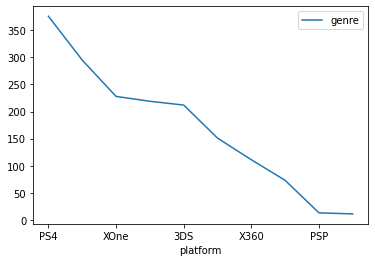

In [25]:
actual_platform_sales_table.plot()

Видим что по продажам лидируют новые платформы.

Выведем топ 4 платформы на экран.

In [26]:
actual_best_sale_platform = list(actual_platform_sales_table.index[:4])
display(actual_best_sale_platform)

['PS4', 'PSV', 'XOne', 'PS3']

Выведем продажи актуальных платформ по годам. 

In [27]:
for platform in actual_best_sale_platform:
    actual_platform_sales_table = pd.pivot_table(actual_platform_sales.query('platform == @platform'), index=['platform','year_of_release'],
                                                 values='world_sales', aggfunc='sum')
    print(actual_platform_sales_table)

                          world_sales
platform year_of_release             
PS4      2014.0            100.000000
         2015.0            118.900002
         2016.0             69.250000
                          world_sales
platform year_of_release             
PSV      2014.0                 11.90
         2015.0                  6.25
         2016.0                  4.25
                          world_sales
platform year_of_release             
XOne     2014.0             54.070000
         2015.0             60.139999
         2016.0             26.150000
                          world_sales
platform year_of_release             
PS3      2014.0             47.759998
         2015.0             16.820000
         2016.0              3.600000


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: world_sales, dtype: float64

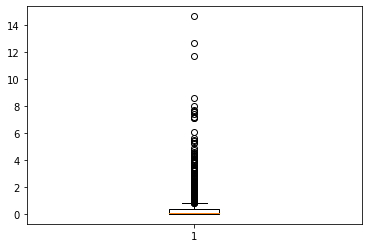

In [28]:
# Методом plt.boxplot построим график "ящик с усами" по общим продажам.
plt.boxplot(x = actual_platform_sales['world_sales'])
actual_platform_sales['world_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: world_sales, dtype: float64

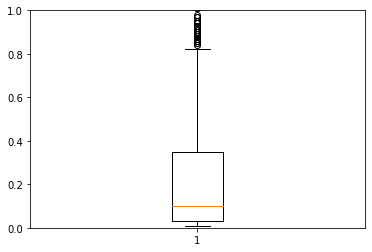

In [29]:
# Методом plt.boxplot построим график "ящик с усами" по общим продажам.
plt.boxplot(x = actual_platform_sales['world_sales'])
plt.ylim(0, 1)
actual_platform_sales['world_sales'].describe()

Средняя выручка по миру 431 тысяч, 75% прринесли 350 тысяч.

count    219.000000
mean       0.311324
std        0.633059
min        0.010000
25%        0.040000
50%        0.110000
75%        0.325000
max        5.270000
Name: world_sales, dtype: float64

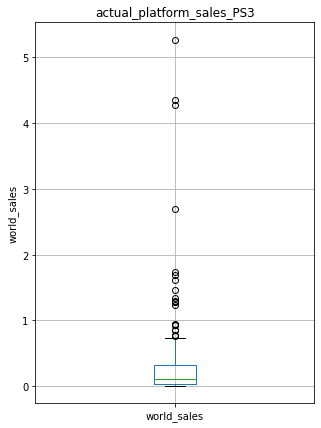

In [30]:
# Построим график "ящик с усами" для платформы PS3.
actual_platform_sales_PS3 = actual_platform_sales.query('platform =="PS3"')
actual_platform_sales_PS3.boxplot(column = 'world_sales', figsize=(5, 7))
plt.title('actual_platform_sales_PS3')
plt.ylabel('world_sales')

actual_platform_sales_PS3['world_sales'].describe()
#display(actual_platform_sales_PS3)

count    219.000000
mean       0.311324
std        0.633059
min        0.010000
25%        0.040000
50%        0.110000
75%        0.325000
max        5.270000
Name: world_sales, dtype: float64

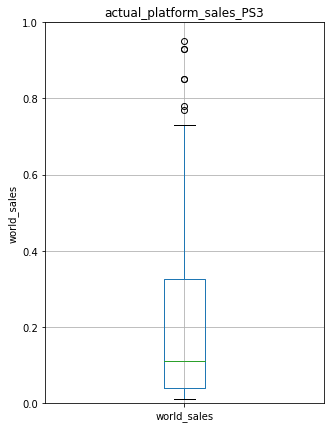

In [31]:
# Построим график "ящик с усами" для платформы PS3.
actual_platform_sales_PS3 = actual_platform_sales.query('platform =="PS3"')
actual_platform_sales_PS3.boxplot(column = 'world_sales', figsize=(5, 7))
plt.ylim(0, 1)
plt.title('actual_platform_sales_PS3')
plt.ylabel('world_sales')

actual_platform_sales_PS3['world_sales'].describe()
#display(actual_platform_sales_PS3)

Средняя выручка по PS3 311 тысяч, 75% принесли 325 тысяч.

count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: world_sales, dtype: float64

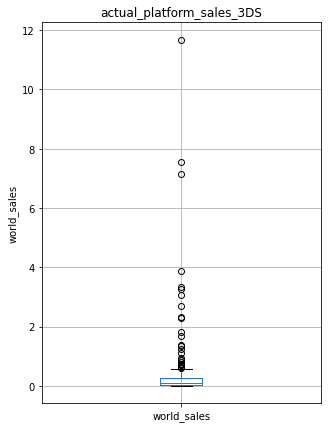

In [32]:
# Построим график "ящик с усами" для платформы 3DS.
actual_platform_sales_3DS = actual_platform_sales.query('platform =="3DS"')
actual_platform_sales_3DS.boxplot(column = 'world_sales', figsize=(5, 7))
plt.title('actual_platform_sales_3DS')
plt.ylabel('world_sales')

actual_platform_sales_3DS['world_sales'].describe()

count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: world_sales, dtype: float64

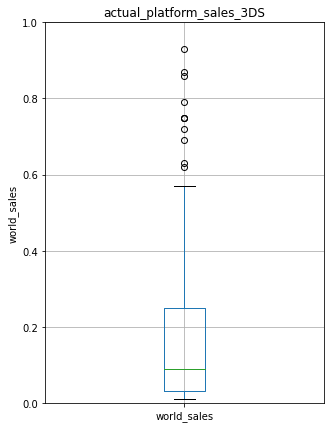

In [33]:
# Построим график "ящик с усами" для платформы 3DS.
actual_platform_sales_3DS = actual_platform_sales.query('platform =="3DS"')
actual_platform_sales_3DS.boxplot(column = 'world_sales', figsize=(5, 7))
plt.ylim(0, 1)
plt.title('actual_platform_sales_3DS')
plt.ylabel('world_sales')

actual_platform_sales_3DS['world_sales'].describe()

Средняя выручка по 3DS 408 тысяч, 75% принесли 250 тысяч.

count    111.000000
mean       0.434414
std        0.628967
min        0.010000
25%        0.070000
50%        0.180000
75%        0.505000
max        4.280000
Name: world_sales, dtype: float64

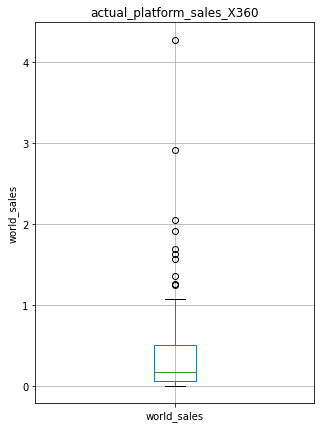

In [34]:
# Построим график "ящик с усами" для платформы X360.
actual_platform_sales_X360 = actual_platform_sales.query('platform =="X360"')
actual_platform_sales_X360.boxplot(column = 'world_sales', figsize=(5, 7))
plt.title('actual_platform_sales_X360')
plt.ylabel('world_sales')
actual_platform_sales_X360['world_sales'].describe()

count    111.000000
mean       0.434414
std        0.628967
min        0.010000
25%        0.070000
50%        0.180000
75%        0.505000
max        4.280000
Name: world_sales, dtype: float64

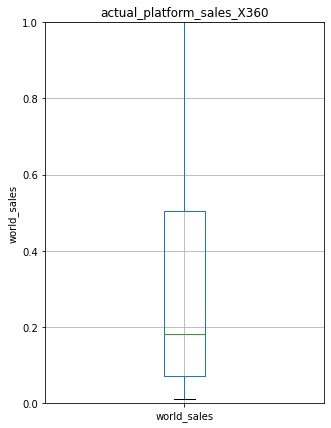

In [35]:
# Построим график "ящик с усами" для платформы X360.
actual_platform_sales_X360 = actual_platform_sales.query('platform =="X360"')
actual_platform_sales_X360.boxplot(column = 'world_sales', figsize=(5, 7))
plt.ylim(0, 1)
plt.title('actual_platform_sales_X360')
plt.ylabel('world_sales')
actual_platform_sales_X360['world_sales'].describe()

Средняя выручка по X360 434 тысяч, 75% принесли 505 тысяч.

count    295.000000
mean       0.075932
std        0.141591
min        0.010000
25%        0.020000
50%        0.040000
75%        0.090000
max        1.960000
Name: world_sales, dtype: float64

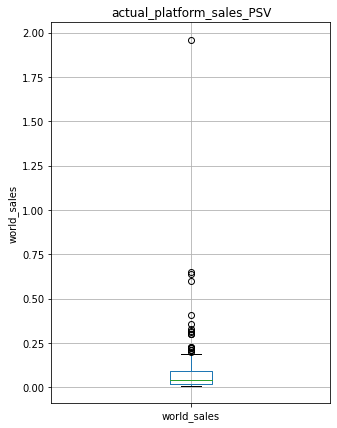

In [36]:
# Построим график "ящик с усами" для платформы PSV.
actual_platform_sales_PSV = actual_platform_sales.query('platform =="PSV"')
actual_platform_sales_PSV.boxplot(column = 'world_sales', figsize=(5, 7))
plt.title('actual_platform_sales_PSV')
plt.ylabel('world_sales')
actual_platform_sales_PSV['world_sales'].describe()

count    295.000000
mean       0.075932
std        0.141591
min        0.010000
25%        0.020000
50%        0.040000
75%        0.090000
max        1.960000
Name: world_sales, dtype: float64

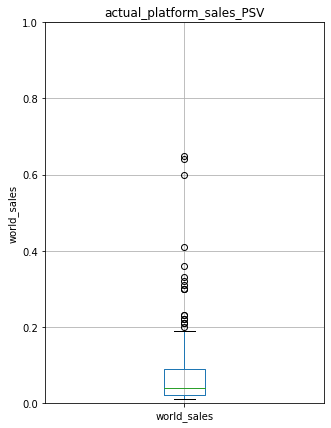

In [37]:
# Построим график "ящик с усами" для платформы PSV.
actual_platform_sales_PSV = actual_platform_sales.query('platform =="PSV"')
actual_platform_sales_PSV.boxplot(column = 'world_sales', figsize=(5, 7))
plt.ylim(0, 1)
plt.title('actual_platform_sales_PSV')
plt.ylabel('world_sales')
actual_platform_sales_PSV['world_sales'].describe()

Средняя выручка по PSV 75 тысяч, 75% принесли 90 тысяч.

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: world_sales, dtype: float64

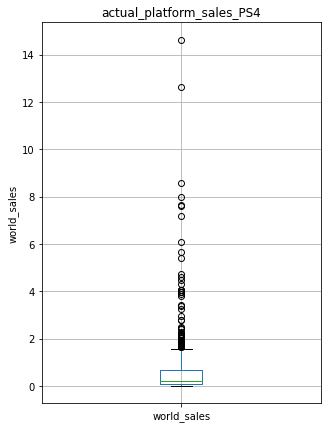

In [38]:
# Построим график "ящик с усами" для платформы PS4.
actual_platform_sales_PS4 = actual_platform_sales.query('platform =="PS4"')
actual_platform_sales_PS4.boxplot(column = 'world_sales', figsize=(5, 7))
plt.title('actual_platform_sales_PS4')
plt.ylabel('world_sales')
actual_platform_sales_PS4['world_sales'].describe()

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: world_sales, dtype: float64

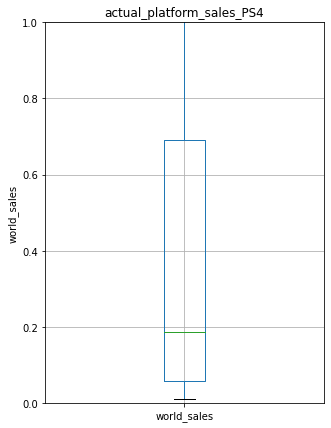

In [39]:
# Построим график "ящик с усами" для платформы PS4.
actual_platform_sales_PS4 = actual_platform_sales.query('platform =="PS4"')
actual_platform_sales_PS4.boxplot(column = 'world_sales', figsize=(5, 7))
plt.ylim(0, 1)
plt.title('actual_platform_sales_PS4')
plt.ylabel('world_sales')
actual_platform_sales_PS4['world_sales'].describe()

Средняя выручка по PS4 766 тысяч, 75% принесли 690 тысяч.

In [40]:
display(actual_platform_sales_PS4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,14.630000
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.580000
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,NaN,7.980000
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.660000
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.010000
16503,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.010000
16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.010000
16530,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.010000


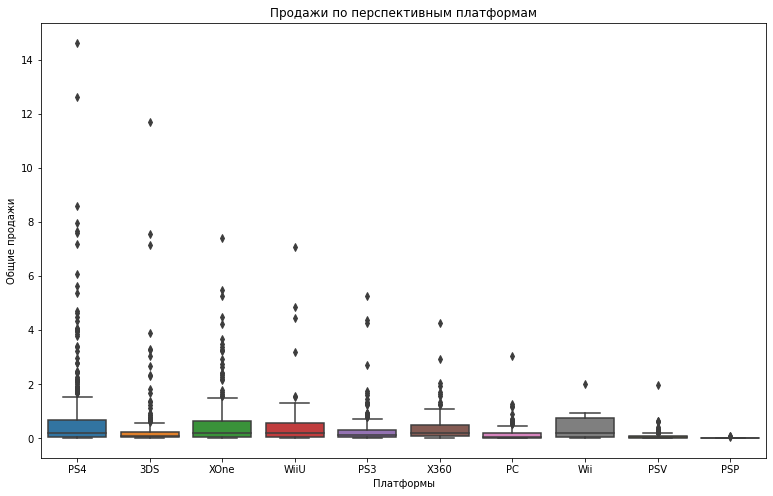

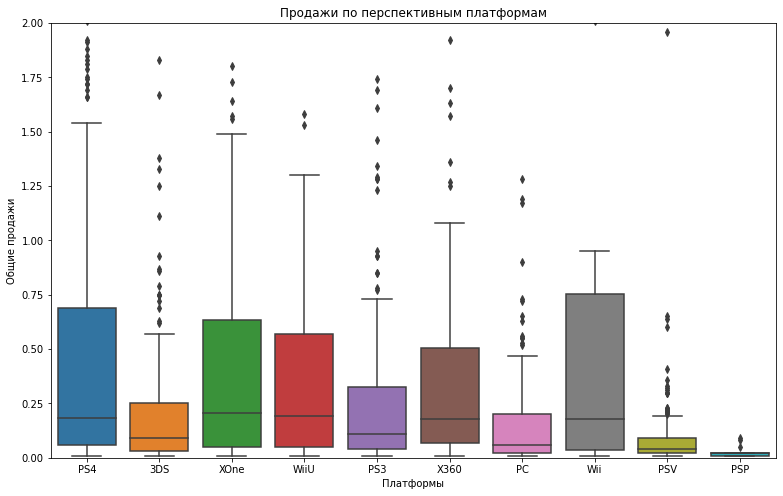

In [41]:
import seaborn as sns
data_temp, y = actual_platform_sales, 'world_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

Посмотрим, как влияют на продажи внутри платформы PS3 отзывы пользователей и критиков. 

In [42]:
user_critic_score_PS3 = actual_platform_sales_PS3.loc[:,['world_sales', 'critic_score', 'user_score']]
display(user_critic_score_PS3.head(10))
user_critic_score_PS3.info()

,world_sales,critic_score,user_score
180,5.27,-1.0,-1.0
255,4.36,-1.0,4.8
264,4.28,-1.0,4.5
552,2.70,-1.0,3.2
1021,1.74,-1.0,5.1
1062,1.69,-1.0,-1.0
1141,1.61,-1.0,4.5
1314,1.46,-1.0,2.7
1462,1.34,-1.0,3.5
1517,1.29,-1.0,7.3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 180 to 16710
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   world_sales   219 non-null    float32
 1   critic_score  219 non-null    float32
 2   user_score    219 non-null    float32
dtypes: float32(3)
memory usage: 4.3 KB


Посчитаем корреляцию между отзывами и продажами для платформы PS3. 

In [43]:
user_critic_score_PS3.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.023612,0.207528
critic_score,0.023612,1.000000,0.517588
user_score,0.207528,0.517588,1.000000


Построем диаграмму рассеяния для платформы PS3.

<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>

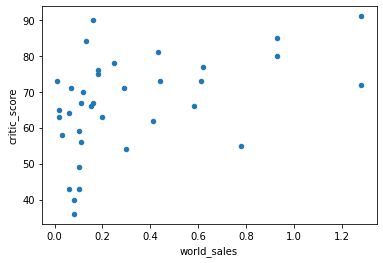

In [44]:
user_critic_score_PS3 = user_critic_score_PS3.query('critic_score > 0')
user_critic_score_PS3.plot(x = 'world_sales', y = 'critic_score', kind='scatter')

<AxesSubplot:xlabel='world_sales', ylabel='user_score'>

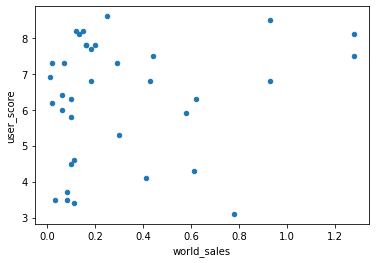

In [45]:
user_critic_score_PS3 = user_critic_score_PS3.query('user_score > 0')
user_critic_score_PS3.plot(x = 'world_sales', y = 'user_score', kind='scatter')

Хорошие отзывы сказались на хороших продажах.

Посмотрим, как влияют на продажи внутри платформы 3DS отзывы пользователей и критиков.

In [46]:
user_critic_score_3DS = actual_platform_sales_3DS.loc[:,['world_sales', 'critic_score', 'user_score']]
display(user_critic_score_3DS.head(10))

,world_sales,critic_score,user_score
47,11.68,-1.0,-1.0
96,7.55,-1.0,-1.0
108,7.14,-1.0,-1.0
312,3.89,86.0,8.7
406,3.32,-1.0,-1.0
412,3.28,-1.0,-1.0
457,3.05,66.0,6.9
563,2.68,-1.0,-1.0
677,2.34,89.0,9.0
694,2.29,-1.0,-1.0


Посчитаем корреляцию между отзывами и продажами для платформы 3DS.

In [47]:
user_critic_score_3DS.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.052992,0.053287
critic_score,0.052992,1.000000,0.885741
user_score,0.053287,0.885741,1.000000


Построем диаграмму рассеяния для платформы 3DS.

<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>

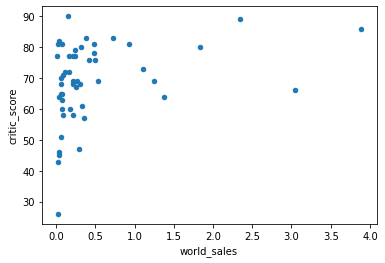

In [48]:
user_critic_score_3DS = user_critic_score_3DS.query('critic_score > 0')
user_critic_score_3DS.plot(x = 'world_sales', y = 'critic_score', kind='scatter')

<AxesSubplot:xlabel='world_sales', ylabel='user_score'>

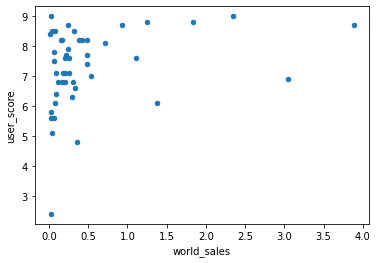

In [49]:
user_critic_score_3DS = user_critic_score_3DS.query('user_score > 0')
user_critic_score_3DS.plot(x = 'world_sales', y = 'user_score', kind='scatter')

Продажи не сильно увеличились не смотря на хорошие отзывы.

Посмотрим, как влияют на продажи внутри платформы X360 отзывы пользователей и критиков.

In [50]:
user_critic_score_X360 = actual_platform_sales_X360.loc[:,['world_sales', 'critic_score', 'user_score']]
display(user_critic_score_X360.head(10))

,world_sales,critic_score,user_score
263,4.28,-1.0,4.9
494,2.92,-1.0,4.2
829,2.05,-1.0,5.5
898,1.92,-1.0,4.7
1049,1.70,-1.0,-1.0
1130,1.63,-1.0,3.0
1182,1.57,-1.0,2.9
1422,1.36,83.0,5.9
1548,1.27,69.0,7.2
1586,1.25,-1.0,5.0


Посчитаем корреляцию между отзывами и продажами для платформы X360.

In [51]:
user_critic_score_X360.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.004012,0.083922
critic_score,0.004012,1.000000,0.372796
user_score,0.083922,0.372796,1.000000


Построем диаграмму рассеяния для платформы X360.

<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>

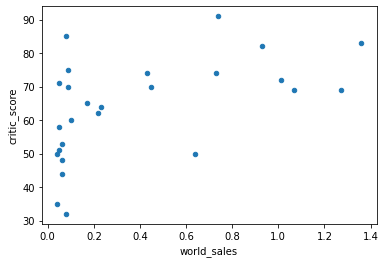

In [52]:
user_critic_score_X360 = user_critic_score_X360.query('critic_score > 0')
user_critic_score_X360.plot(x = 'world_sales', y = 'critic_score', kind='scatter')

<AxesSubplot:xlabel='world_sales', ylabel='user_score'>

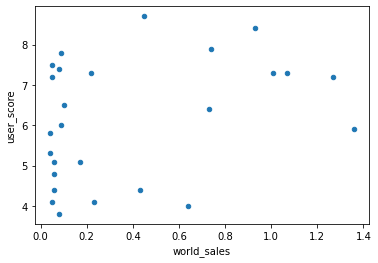

In [53]:
user_critic_score_X360 = user_critic_score_X360.query('user_score > 0')
user_critic_score_X360.plot(x = 'world_sales', y = 'user_score', kind='scatter')

Чем лучше отзывы, тем больше продаж.

Посмотрим, как влияют на продажи внутри платформы PSV отзывы пользователей и критиков.

In [54]:
user_critic_score_PSV = actual_platform_sales_PSV.loc[:,['world_sales', 'critic_score', 'user_score']]
display(user_critic_score_PSV.head(10))

,world_sales,critic_score,user_score
868,1.96,-1.0,-1.0
3086,0.65,73.0,8.3
3127,0.64,64.0,7.6
3381,0.60,-1.0,3.1
4722,0.41,-1.0,8.1
5188,0.36,70.0,7.1
5610,0.33,81.0,8.4
5630,0.32,76.0,8.6
5863,0.31,-1.0,7.7
5898,0.30,-1.0,-1.0


Посчитаем корреляцию между отзывами и продажами для платформы PSV.

In [55]:
user_critic_score_PSV.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.243921,0.277587
critic_score,0.243921,1.000000,0.822400
user_score,0.277587,0.822400,1.000000


Построем диаграмму рассеяния для платформы PSV.

<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>

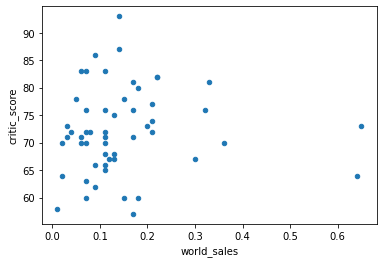

In [56]:
user_critic_score_PSV = user_critic_score_PSV.query('critic_score > 0')
user_critic_score_PSV.plot(x = 'world_sales', y = 'critic_score', kind='scatter')

<AxesSubplot:xlabel='world_sales', ylabel='user_score'>

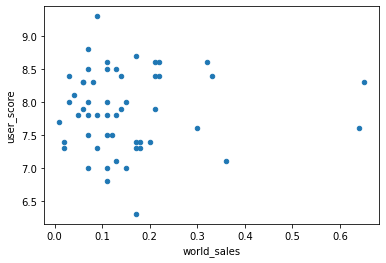

In [57]:
user_critic_score_PSV = user_critic_score_PSV.query('user_score > 0')
user_critic_score_PSV.plot(x = 'world_sales', y = 'user_score', kind='scatter')

Хорошие отзывы не сильно влияют на продажи.

Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков.

In [58]:
user_critic_score_PS4 = actual_platform_sales_PS4.loc[:,['world_sales', 'critic_score', 'user_score']]
display(user_critic_score_PS4.head(10))

,world_sales,critic_score,user_score
31,14.630000,-1.0,-1.0
42,12.620001,97.0,8.3
77,8.580000,82.0,4.3
87,7.980000,-1.0,-1.0
92,7.660000,83.0,5.7
94,7.600000,85.0,5.0
105,7.170000,87.0,6.5
143,6.080000,82.0,5.7
154,5.640000,76.0,6.1
171,5.390000,93.0,7.9


Посчитаем корреляцию между отзывами и продажами для платформы PS4.

In [59]:
user_critic_score_PS4.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.210847,0.104115
critic_score,0.210847,1.000000,0.909339
user_score,0.104115,0.909339,1.000000


Построем диаграмму рассеяния для платформы PS4.

<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>

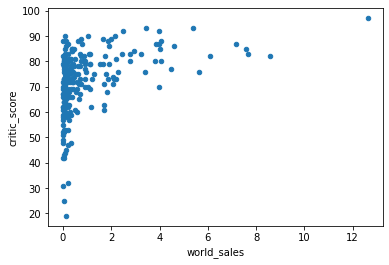

In [60]:
user_critic_score_PS4 = user_critic_score_PS4.query('critic_score > 0')
user_critic_score_PS4.plot(x = 'world_sales', y = 'critic_score', kind='scatter')

<AxesSubplot:xlabel='world_sales', ylabel='user_score'>

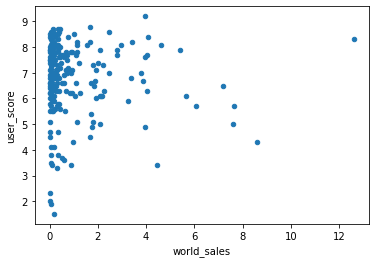

In [61]:
user_critic_score_PS4 = user_critic_score_PS4.query('user_score > 0')
user_critic_score_PS4.plot(x = 'world_sales', y = 'user_score', kind='scatter')

Хорошие отзывы приносят больше продаж.

In [62]:
display(actual_platform_sales.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,14.630000
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,NaN,11.680000
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.580000
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,NaN,7.980000
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.660000
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.600000
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,-1.0,-1.0,NaN,7.550000
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,NaN,7.390000
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.170000


In [63]:
world_sale_table = actual_platform_sales.pivot_table(index = ['user_score', 'critic_score'], values = ['world_sales'], aggfunc = 'mean')
world_sale_table = world_sale_table.sort_values(by = 'world_sales', ascending=False)
display(world_sale_table)

,,world_sales
user_score,critic_score,
8.3,97.0,12.620001
4.3,82.0,8.580000
5.7,83.0,7.660000
5.0,85.0,7.600000
6.5,87.0,7.170000
...,...,...
8.3,82.0,0.010000
6.3,90.0,0.010000
6.8,70.0,0.010000


In [64]:
world_sale_table = world_sale_table.query('critic_score > 0')

count    578.000000
mean       0.640738
std        1.213845
min        0.010000
25%        0.070000
50%        0.210000
75%        0.640000
max       12.620001
Name: world_sales, dtype: float64

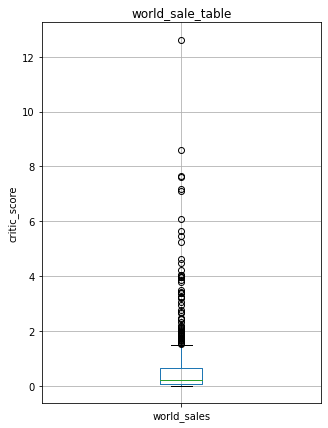

In [65]:
world_sale_table.boxplot(column = 'world_sales', figsize=(5, 7))
plt.title('world_sale_table')
plt.ylabel('critic_score')
world_sale_table['world_sales'].describe()

count    578.000000
mean       0.640738
std        1.213845
min        0.010000
25%        0.070000
50%        0.210000
75%        0.640000
max       12.620001
Name: world_sales, dtype: float64

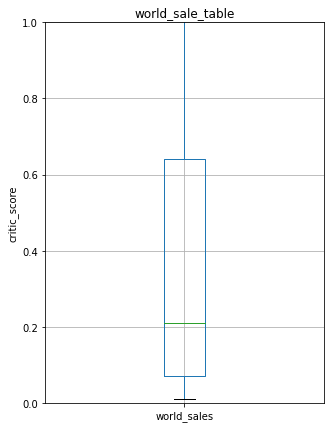

In [66]:
world_sale_table.boxplot(column = 'world_sales', figsize=(5, 7))
plt.ylim(0,1)
plt.title('world_sale_table')
plt.ylabel('critic_score')
world_sale_table['world_sales'].describe()

count    578.000000
mean       0.640738
std        1.213845
min        0.010000
25%        0.070000
50%        0.210000
75%        0.640000
max       12.620001
Name: world_sales, dtype: float64

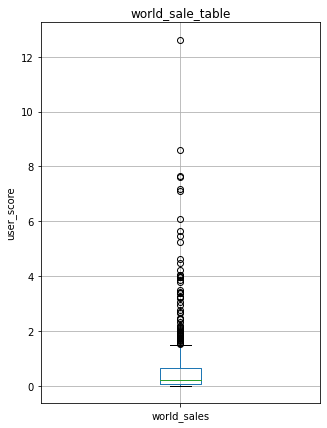

In [67]:
world_sale_table.boxplot(column = 'world_sales', figsize=(5, 7))
plt.title('world_sale_table')
plt.ylabel('user_score')
world_sale_table['world_sales'].describe()

count    578.000000
mean       0.640738
std        1.213845
min        0.010000
25%        0.070000
50%        0.210000
75%        0.640000
max       12.620001
Name: world_sales, dtype: float64

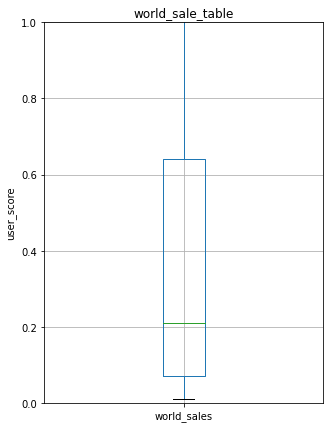

In [68]:
world_sale_table.boxplot(column = 'world_sales', figsize=(5, 7))
plt.ylim(0,1)
plt.title('world_sale_table')
plt.ylabel('user_score')
world_sale_table['world_sales'].describe()

In [69]:
display(actual_platform_sales.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,14.630000
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,NaN,11.680000
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.580000
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,NaN,7.980000
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.660000
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.600000
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,-1.0,-1.0,NaN,7.550000
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,NaN,7.390000
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.170000


In [70]:
world_sales_mean = actual_platform_sales.pivot_table(index = ['genre'], values = ['world_sales'], aggfunc = 'mean')
world_sales_mean = world_sales_mean.sort_values(by = 'world_sales', ascending=False)
display(world_sales_mean.head(10))

,world_sales
genre,
Shooter,1.335469
Sports,0.680000
Platform,0.476053
Fighting,0.470333
Role-Playing,0.459005
Racing,0.398841
Misc,0.332301
Action,0.322068
Simulation,0.298409


count    12.000000
mean      0.427686
std       0.332630
min       0.094865
25%       0.263271
50%       0.365571
75%       0.471763
max       1.335469
Name: world_sales, dtype: float64

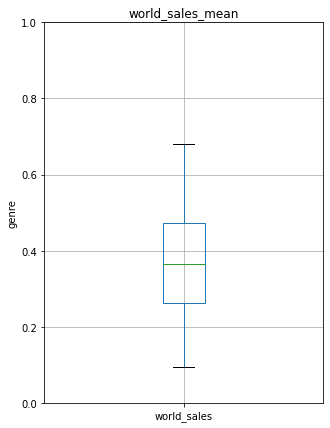

In [71]:
world_sales_mean.boxplot(column = 'world_sales', figsize=(5, 7))
plt.ylim(0,1)
plt.title('world_sales_mean')
plt.ylabel('genre')
world_sales_mean['world_sales'].describe()

Средняя прибыль 427 тысяч, 75% 471 тысяча.

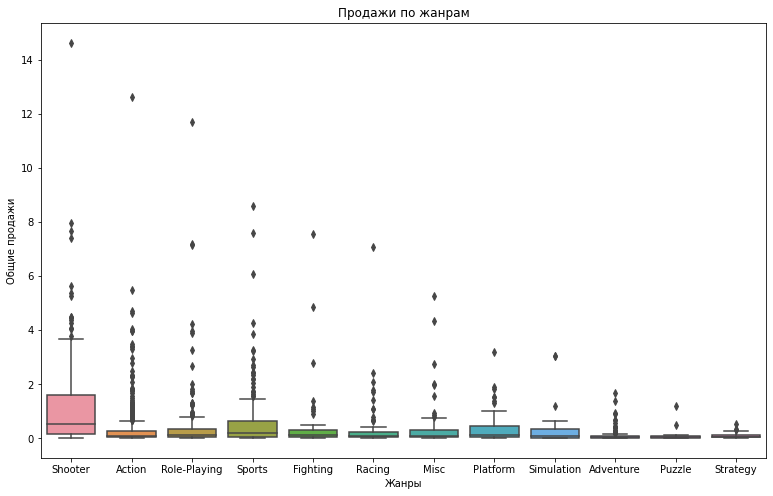

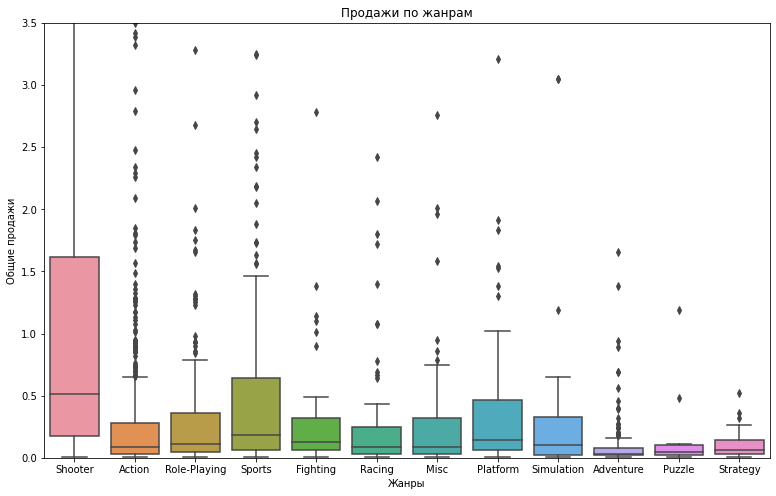

In [72]:
import seaborn as sns
data_temp, y = actual_platform_sales, 'world_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.5)))
plt.show()

##  Составляем портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP): самые популярные платформы (топ-5).

In [73]:
# Определим популятные платформы для Америки.
platform_na = actual_platform_sales.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
platform_na = platform_na.sort_values(by = 'na_sales', ascending=False)
top_platform_na = list(platform_na.index[:5])
display(platform_na)
display(top_platform_na)

,na_sales
platform,
PS4,98.610001
XOne,81.269997
X360,28.299999
3DS,22.639999
PS3,22.049999
WiiU,19.360001
PC,7.230000
PSV,2.520000
Wii,2.080000


['PS4', 'XOne', 'X360', '3DS', 'PS3']

<AxesSubplot:xlabel='platform'>

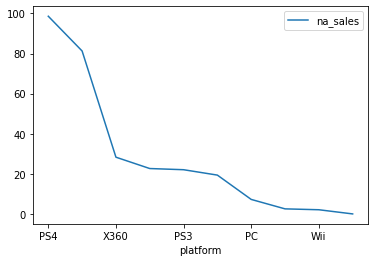

In [74]:
# Создадим график методом plot().
platform_na.plot()

В Америке в топе платформа Xbox.

In [75]:
# Определим популятные платформы для Европы.
platform_eu = actual_platform_sales.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
platform_eu = platform_eu.sort_values(by = 'eu_sales', ascending=False)
top_platform_eu = list(platform_eu.index[:5])
display(platform_eu)
display(top_platform_eu)

,eu_sales
platform,
PS4,130.039993
XOne,46.250000
PS3,25.539999
PC,17.969999
3DS,16.120001
X360,15.490000
WiiU,13.150000
PSV,3.530000
Wii,2.590000


['PS4', 'XOne', 'PS3', 'PC', '3DS']

<AxesSubplot:xlabel='platform'>

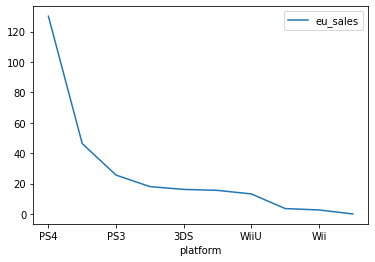

In [76]:
platform_eu.plot()

В Европе в топе PS3.

In [77]:
# Определим популятные платформы для Японии.
platform_jp = actual_platform_sales.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
platform_jp = platform_jp.sort_values(by = 'jp_sales', ascending=False)
top_platform_jp = list(platform_jp.index[:5])
display(platform_jp)
display(top_platform_jp)

,jp_sales
platform,
3DS,44.240002
PS4,15.020000
PSV,14.540000
PS3,11.220000
WiiU,7.310000
PSP,0.360000
XOne,0.320000
X360,0.080000
PC,0.000000


['3DS', 'PS4', 'PSV', 'PS3', 'WiiU']

<AxesSubplot:xlabel='platform'>

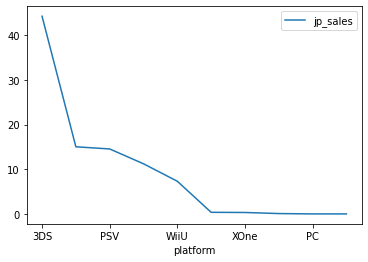

In [78]:
platform_jp.plot()

В Японии в топе платформа DS.

Определим самые популярные жанры (топ-5).

In [79]:
# Самые популярные жанры для Америки.
genre_na = actual_platform_sales.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
genre_na = genre_na.sort_values(by = 'na_sales', ascending=False)
top_genre_na = list(genre_na.index[:5])
display(genre_na)
display(top_genre_na)

,na_sales
genre,
Shooter,79.019997
Action,72.529999
Sports,46.130001
Role-Playing,33.470001
Misc,15.050000
Fighting,12.430000
Racing,8.740000
Platform,6.790000
Adventure,5.640000


['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc']

<AxesSubplot:xlabel='genre'>

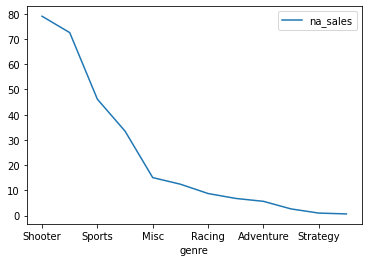

In [80]:
genre_na.plot()

В Америке предпочитают экшены и спортивные игры.

In [81]:
# Самые популярные жанры для Европы.
genre_eu = actual_platform_sales.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
genre_eu = genre_eu.sort_values(by = 'eu_sales', ascending=False)
top_genre_eu = list(genre_eu.index[:5])
display(genre_eu)
display(top_genre_eu)

,eu_sales
genre,
Action,74.680000
Shooter,65.519997
Sports,45.730000
Role-Playing,28.170000
Racing,14.130000
Misc,12.860000
Simulation,7.300000
Platform,6.800000
Fighting,6.690000


['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']

<AxesSubplot:xlabel='genre'>

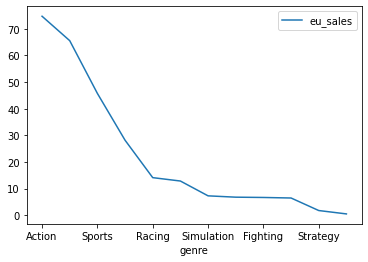

In [82]:
genre_eu.plot()

в Европе предпочитают экшены и спортивные игры.

In [83]:
# Самые популярные жанры для Японии.
genre_jp = actual_platform_sales.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
genre_jp = genre_jp.sort_values(by = 'jp_sales', ascending=False)
top_genre_jp = list(genre_jp.index[:5])
display(genre_jp)
display(top_genre_jp)

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
Adventure,3.60
Sports,3.26
Platform,2.69
Simulation,2.31


['Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter']

<AxesSubplot:xlabel='genre'>

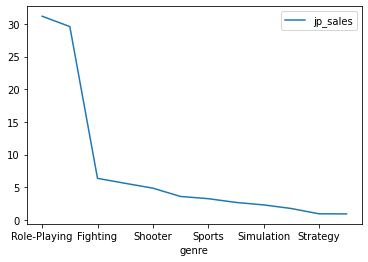

In [84]:
genre_jp.plot()

Видим что игроки из японии предпочитают ролевые игры и экшены.

In [87]:
actual_platform_sales.rating = actual_platform_sales.rating.fillna('Unknown')

In [88]:
rating_na = actual_platform_sales.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
rating_na = rating_na.sort_values(by = 'na_sales', ascending=False)
top_rating_na = list(rating_na.index[:5])
display(rating_na)
display(top_rating_na)

,na_sales
rating,
M,96.419998
Unknown,64.720001
E,50.740002
T,38.950001
E10+,33.230000


['M', 'Unknown', 'E', 'T', 'E10+']

In [89]:
rating_eu = actual_platform_sales.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
rating_eu = rating_eu.sort_values(by = 'eu_sales', ascending=False)
top_rating_eu = list(rating_eu.index[:5])
display(rating_eu)
display(top_rating_eu)

,eu_sales
rating,
M,93.440002
Unknown,58.950001
E,58.060001
T,34.070000
E10+,26.160000


['M', 'Unknown', 'E', 'T', 'E10+']

<AxesSubplot:xlabel='rating'>

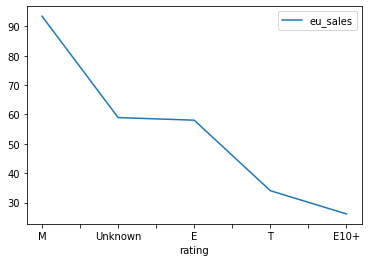

In [90]:
rating_eu.plot()

In [91]:
rating_jp = actual_platform_sales.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
rating_jp = rating_jp.sort_values(by = 'jp_sales', ascending=False)
top_rating_jp = list(rating_jp.index[:5])
display(rating_jp)
display(top_rating_jp)

,jp_sales
rating,
Unknown,56.900002
T,14.780000
E,8.940000
M,8.010000
E10+,4.460000


['Unknown', 'T', 'E', 'M', 'E10+']

<AxesSubplot:xlabel='rating'>

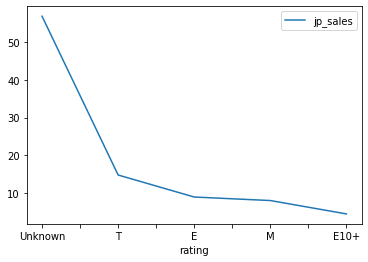

In [92]:
rating_jp.plot()

В Америке и Европе в топе игры с рейтингом для пользователей старше 17 лет.
В Японии для пользователей от 13 лет.

In [93]:
# Комментарий ревьюера 3
temp = actual_platform_sales.copy()
rating = temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp)
temp.rating.value_counts()

Unknown    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

## Проверка гипотез

In [94]:
display(actual_platform_sales.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.630000
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,Unknown,11.680000
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.580000
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,Unknown,7.980000
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.660000
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.600000
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,-1.0,-1.0,Unknown,7.550000
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,Unknown,7.390000
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.170000


Нулевая гипотеза Н0 средние пользовательские рейтинги платформ Xbox One и PC равны.(Н0 всегда со знаком равенства)

Н1 альтернативная гипотеза средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [95]:
actual_platform_sales = actual_platform_sales.query('user_score > 0')

In [96]:
Xbox_mean_test = actual_platform_sales[actual_platform_sales['platform']=='XOne']['user_score'].dropna()
PC_mean_test = actual_platform_sales[actual_platform_sales['platform']=='PC']['user_score'].dropna()

# уровень значимости 5%
alpha = 0.05

results = st.ttest_ind(Xbox_mean_test, PC_mean_test)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450648637161196
Не получилось отвергнуть нулевую гипотезу


Получилось что средние пользовательские рейтинги платформ Xbox One и PC равны.

Нулевая гипотеза Н0 средние пользовательские рейтинги жанров Action и Sports равны.

Н1 альтернативная гипотеза средние пользовательские рейтинги жанров Action и Sports разные.

In [97]:
actual_platform_sales = actual_platform_sales.query('user_score > 0')

In [98]:
Action_mean_test = actual_platform_sales.query('genre == "Action"')['user_score'].dropna()
Sports_mean_test = actual_platform_sales.query('genre == "Sports"')['user_score'].dropna()

# уровень значимости 5%
alpha = 0.05

results = st.ttest_ind(Action_mean_test, Sports_mean_test)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.871148452488903e-19
Отвергаем нулевую гипотезу


Хотели проверить что средние пользовательские рейтинги жанров Action и Sports отличаються, так и есть.

# Вывод

1. Видим что платформы PS4 и XOne это новые платформы и надо делать упор на них.
2. Новые платформы приносят больше денег при меньшем количесте игр.
3. В Америке и Европе надо делать упор на экшены и спортивные игры;популярны игры с возрастным ограничением 17+.
4. В Японии популярные жанры ролевые игры и экшены;популярны игры с возрастным ограничением 13+